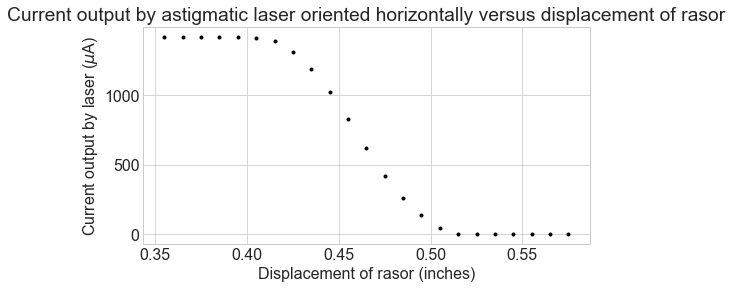

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8, 4]
import numpy as np
import pandas as pd

'''Plotting by manually inputing arrays'''

### Note that this data is scanned in the horizontal direction
### One more scan in perpendicular direction is needed to create complete Gaussian intensity plot
### Current output is proportional to power of beam on photodiode

#Displacement variable in inches
disp = np.array([0.355,
0.365,
0.375,
0.385,
0.395,
0.405,
0.415,
0.425,
0.435,
0.445,
0.455,
0.465,
0.475,
0.485,
0.495,
0.505,
0.515,
0.525,
0.535,
0.545,
0.555,
0.565,
0.575
])

#Displacement uncertainty in inches
disp_u = np.array([0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005,
0.0005
])

#Current variable in microamperes
cur = np.array([1417.8,
1417.8,
1417.8,
1417.8,
1414.8,
1412.8,
1388.8,
1307.8,
1186.8,
1022.8,
825.8,
621.8,
418.8,
262.8,
136.8,
45.8,
3.3,
0.7,
0.2,
0,
0.1,
0,
0
])

#Current uncertainty in microamperes
cur_u = np.array([2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
2.002498439,
1.004987562,
1.004987562,
1.004987562,
0.141421356,
0.141421356,
0.141421356,
0.141421356,
0.141421356,
0.141421356,
0.141421356
])

plt.errorbar(disp, cur, xerr = disp_u, yerr = cur_u, fmt = '.k')
plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current output by astigmatic laser oriented horizontally versus displacement of razor')
plt.show()

a = 712.12, b = 27.20, c = 12.53
Standard deviations: σa = 2.14, σb = 0.36, σc = 0.17


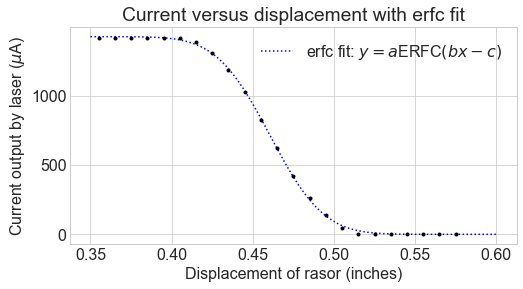

In [6]:
from scipy import special
from scipy.optimize import curve_fit

'''Plotting using manually inputted arrays'''

# Choose parameters we want to find of fitted erfc function 
def fit_function(x, a, b, c):
    return a * special.erfc(b * x - c)

# Return parameters of fitted erfc in popt
# Return covariance matrix in pcov
popt, pcov = curve_fit(fit_function, disp, cur, bounds = ([700, -100, -20], [800, 100, 20]))
value = tuple(popt)
print(f'a = {value[0]:{1}.{5}}, b = {value[1]:{1}.{4}}0, c = {value[2]:{1}.{4}}')

# Calculates and returns standard deviations of parameters
standard_div = tuple(np.sqrt(np.diag(pcov)))
# Since we want the standard deviation, we take the root of the diagonal of the covariance matrix
print(f'Standard deviations: σa = {standard_div[0]:{1}.{3}}, σb = {standard_div[1]:{1}.{2}}, σc = {standard_div[2]:{1}.{2}}' 
      )

# Plots scatterplot with errorbars
plt.errorbar(disp, cur, yerr = cur_u, xerr = disp_u, fmt = '.k');

# Chooses x-values over which to plot our fitted function
x = np.linspace(0.35, 0.6, 100)

# Plots fitted function where plt.plot(x-values, y-values, line style, label)
# Note asterisk in *popt unpacks the array to create 3 arguments, aka the parameters
plt.plot(x, fit_function(x, *popt), 'b:',
        # Label describing fitted function
        label = r'erfc fit: $y = a $ERFC$\left(b x - c\right)$')

# Labels the plot
plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current versus displacement with erfc fit')
plt.legend()
plt.show()

In [7]:
# df saves csv by the name 'something.csv' as data frame
df=pd.read_csv('LaserProfileCSV05_28_2021.csv')
df

,x,x error,y,y error
0,0.355,0.0005,1417.8,2.002498
1,0.365,0.0005,1417.8,2.002498
2,0.375,0.0005,1417.8,2.002498
3,0.385,0.0005,1417.8,2.002498
4,0.395,0.0005,1414.8,2.002498
5,0.405,0.0005,1412.8,2.002498
6,0.415,0.0005,1388.8,2.002498
7,0.425,0.0005,1307.8,2.002498
8,0.435,0.0005,1186.8,2.002498
9,0.445,0.0005,1022.8,2.002498


In [8]:
# Cuts off df values beyond certain x-values and calls it df_1; note df[inside] takes logic statements to restrict domain / range
df_1=df[(df['x'] > 0.4) & (df['x'] < 0.53)]
df_1

,x,x error,y,y error
5,0.405,0.0005,1412.8,2.002498
6,0.415,0.0005,1388.8,2.002498
7,0.425,0.0005,1307.8,2.002498
8,0.435,0.0005,1186.8,2.002498
9,0.445,0.0005,1022.8,2.002498
10,0.455,0.0005,825.8,2.002498
11,0.465,0.0005,621.8,2.002498
12,0.475,0.0005,418.8,2.002498
13,0.485,0.0005,262.8,1.004988
14,0.495,0.0005,136.8,1.004988


a = 712.12, b = 27.2, c = 12.53
Standard deviations: σa = 2.14, σb = 0.36, σc = 0.17


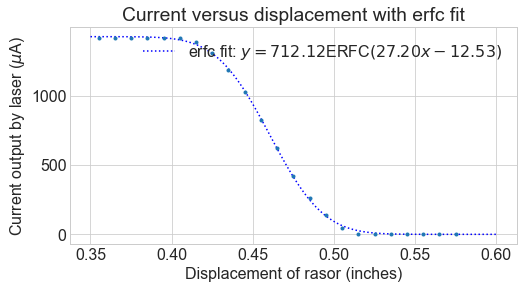

In [9]:
'''Plotting using automatically inputted data'''

# Defines x_data as column under 'x', y_data as column under 'y'.
x_data = df['x']
y_data = df['y']

def fit_function(x, a, b, c):
    return a * special.erfc(b * x - c)

popt, pcov = curve_fit(fit_function, x_data, y_data, bounds = ([700, -100, -20], [800, 100, 20]))
print(f'a = {value[0]:{1}.{5}}, b = {value[1]:{1}.{4}}, c = {value[2]:{1}.{4}}')

standard_div = tuple(np.sqrt(np.diag(pcov)))
print(f'Standard deviations: σa = {standard_div[0]:{1}.{3}}, σb = {standard_div[1]:{1}.{2}}, σc = {standard_div[2]:{1}.{2}}' 
      )

x = np.linspace(0.35, 0.6, 100)

# Plots fitted function
plt.plot(x, fit_function(x, *popt), 'b:',
         # How to use label with tuple of floats
         label = r'erfc fit: $y = %1.2f $ERFC$\left(%1.2f x - %1.2f\right)$' % tuple(popt))

# Plots scatterplot
plt.plot(df['x'], df['y'], marker='.', ls='None')

plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current versus displacement with erfc fit')
plt.legend(loc = 1)
plt.show()

A = 21852.94, B = 27.2, C = 12.53
Standard deviations: σA = 300.4, σB = 0.40, σC = 0.17


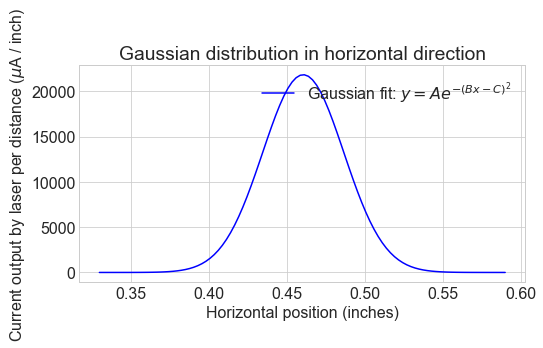

In [10]:
'''Gaussian beam intensity'''

# Assigns values of parameters and std.d of erfc to variables
a, b, c = tuple(popt)
a_u, b_u, c_u = standard_div

# Calculates parameters of Gaussian distribution
A = 2 * a * b / np.sqrt(np.pi)
B = b
C = c
# Creating a tuple
coe = A, B, C
print(f'A = {coe[0]:{1}.{7}}, B = {coe[1]:{1}.{3}}, C = {coe[2]:{1}.{4}}')

# Calculates standard deviations of parameters of Gaussian distribution
A_u = A * np.sqrt((a_u / a) ** 2 + (b_u / b) ** 2)
B_u = b_u
C_u = c_u
coe_u = A_u, B_u, C_u
print(f'Standard deviations: σA = {coe_u[0]:{1}.{5}}, σB = {coe_u[1]:{1}.{1}}0, σC = {coe_u[2]:{1}.{2}}')

x = np.linspace(0.33, 0.59, 100)

plt.plot(x, A * np.exp(-(B * x - C) ** 2), 'b',
          label= r'Gaussian fit: $y = A e^{-\left(B x - C\right)^{2}}$')

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
plt.legend(loc = 1)
plt.show()

In [11]:
'''Create data frame from points on Gaussian distribution'''
x = np.linspace(0.33, 0.59, 100)
y = A * np.exp(-(B * x - C) ** 2)

df_2 = pd.DataFrame(list(zip(x, y)),
               columns =['x', 'y'])
df_2

,x,y
0,0.330000,0.072248
1,0.332626,0.119397
2,0.335253,0.195314
3,0.337879,0.316257
4,0.340505,0.506894
...,...,...
95,0.579495,0.631884
96,0.582121,0.396154
97,0.584747,0.245845
98,0.587374,0.151017


In [12]:
'''Create dataframe containing points within beam radius of Gaussian distribution'''
# Note that beam radius is at intensity of (Max intensity)/e^2, or 0.1353*Max
### Even though we haven't found the intensity yet, I treat the distribution as such

Max = A
Cutoff = 0.1353 * Max
print(Cutoff)

# Data frame of data within beam radius
df_radius = df_2[df_2['y'] >= Cutoff]
df_radius

2956.70273566184


,x,y
30,0.408788,2995.265801
31,0.411414,3644.816504
32,0.414040,4390.207022
33,0.416667,5234.357258
34,0.419293,6177.471521
35,0.421919,7216.509253
36,0.424545,8344.736423
37,0.427172,9551.401567
38,0.429798,10821.578522
39,0.432424,12136.212039


In [13]:
'''Find beam radius, aka $\sigma_{0}$'''
## Find x s.t. y = Cutoff; I do this manually :(

# Left bound of beam
x1 = (C - np.sqrt(2)) / B
# Right bound of beam
x2 = (C + np.sqrt(2)) / B

# Radius of beam
Radius = (x2 - x1) / 2

# Center of beam
Center = (x1 + x2) / 2

print("Beam in horizontal direction, i.e. oblong direction; all units in inches")
print("Left bound: %f" % x1)
print("Right bound: %f" % x2)
print("Beam radius: %f" % Radius)
print("Center: %f" % Center)

Beam in horizontal direction, i.e. oblong direction; all units in inches
Left bound: 0.408623
Right bound: 0.512624
Beam radius: 0.052001
Center: 0.460623
